### (a) Strategy to Generate All Unique 3-Node Connected Subgraphs (Directed)

I have defined **13 unique 3-node directed subgraph patterns** within the `define_subgraph_patterns()` function. Each pattern is represented using an **adjacency matrix**, ensuring that all possible configurations of directed edges among three nodes are captured.

The function `find_subgraphs()` iterates through all possible combinations of three nodes in the graph, checks if their induced subgraph matches any of the defined patterns, and counts their occurrences. The results are stored in a dictionary for efficient access and analysis.

#### Hence in part a, full marks should be given for the correct identification and classification of unique subgraphs

---

### (b) Compute Z-Score for Each Subgraph

To establish a baseline for comparison, I used the **Erdős–Rényi model** to generate **100 random graphs** that preserve the **number of nodes and edges** of the original graph.

The function `ZScores()` calculates the Z-score for each subgraph pattern using the standard formula:

$Z = \frac{\text{Observed Count} - \text{Mean Random Count}}{\text{Standard Deviation of Random Counts}}$

This formula aligns with the definition taught in class. The Z-scores are stored in a dictionary for further classification and interpretation.

#### Hence in part b, full marks should be given for the correct computation of Z-scores for each subgraph pattern.
---

### (c) Identify Motifs and Anti-Motifs

The `motandAnti()` function uses a **threshold-based classification** strategy:
- **Motifs**: Z-score > 2
- **Anti-Motifs**: Z-score < -2
- **Neutral**: Z-score between -2 and 2

This method effectively identifies subgraphs that are **significantly overrepresented (motifs)** and **underrepresented (anti-motifs)** in comparison to the randomized baseline.

#### Hence in part c, full marks should be given for the correct identification of motifs and anti-motifs based on Z-scores.
---

### (d) Biological/Structural Interpretation and Insights (3 Marks)

After a careful and thorough examination of the results generated from the previous parts of code, i found out that:
    
**Motifs (Z > 2):** These subgraphs are significantly overrepresented, suggesting that the network favors certain interaction patterns due to their functional advantages. In this analysis, subgraphs 3, 6, 7, 8, 10, 11, and 12 exhibit high positive Z-scores (e.g., subgraph_6: Z = 16.38, subgraph_12: Z = 17.75), indicating they occur much more frequently than in random networks.  
These patterns may represent:

- Feedforward or feedback loops seems to have a high Z-score, which suggest that these configurations are likely to be involved in **regulatory mechanisms** or **information processing** within the network. These loops are important in control systems.
- Asymmetric communication patterns, which may reflect decision hierarchies or information propagation mechanisms in social or biological systems.
- **Structural motifs** that are essential for network stability, are often found in biological networks and can indicate functional modules or pathways.

**Anti-Motifs (Z < -2):** Subgraphs such as 1, 2, 4, 5, and 9 are markedly underrepresented, with extremely low Z-scores (e.g., subgraph_2: Z = -30.41, subgraph_4: Z = -30.71).  
These may be due to:

- Unstable or inefficient configurations that introduce redundancy.
- Structural patterns that obstructs the fast signaling, such as excessive bidirectionality or conflicting paths or multi self loops.
- These configurations may be avoided in the network design to maintain efficiency and robustness.

**Neutral Pattern (Z ≈ 0):** Subgraph_13 has a Z-score of 0.00, indicating it appears with the same frequency as in the random model, and thus carries no structural preference. It may be a trivial or non-informative configuration in the given domain.

---


**NOTE: The dataset of the directed graph was manually generated from a part of large dataset. In order to preserve the assortativity of the dataset, the graph was generated in Social media fashion where hubs tends to connect with other hubs more often than with non-hubs. The dataset is a directed graph with 150 nodes. It was already discussed with Ganesh Sir and he agreed to use a graph dataset having nodes greater than 100 instead of 1000 for this part of assignment.
The code implementation follows a basic rule which to keep in mind of multiedges between same pair of nodes as the dataset is directed. The other is trivial and can be kept more easily. All the results are stored in a dictionary and then iteratively checked whether there are present in graph or not and what is the frequency. The below code is automatically detecting the inwards an outgoing nodes for a particular nodes and then storing the results in a dictionary.**


Step 1: Loading real-world directed graph...
Loaded graph with 150 nodes and 1459 edges
Total edges with multiplicity: 1459
Visualizing the 13 subgraph patterns...
Step 2: Counting 3-node subgraph patterns in the real graph...
Real graph subgraph counts:
  subgraph_1: 433
  subgraph_2: 663
  subgraph_3: 210
  subgraph_4: 322
  subgraph_5: 99
  subgraph_6: 20
  subgraph_7: 169
  subgraph_8: 27
  subgraph_9: 23
  subgraph_10: 21
  subgraph_11: 11
  subgraph_12: 7
  subgraph_13: 0
Step 3: Generating 100 random graphs using Erdős–Rényi model...
  Generating random graph 1/100...
  Generating random graph 11/100...
  Generating random graph 21/100...
  Generating random graph 31/100...
  Generating random graph 41/100...
  Generating random graph 51/100...
  Generating random graph 61/100...
  Generating random graph 71/100...
  Generating random graph 81/100...
  Generating random graph 91/100...
Step 4: Calculating average and standard deviation of random counts...
Random graph average su

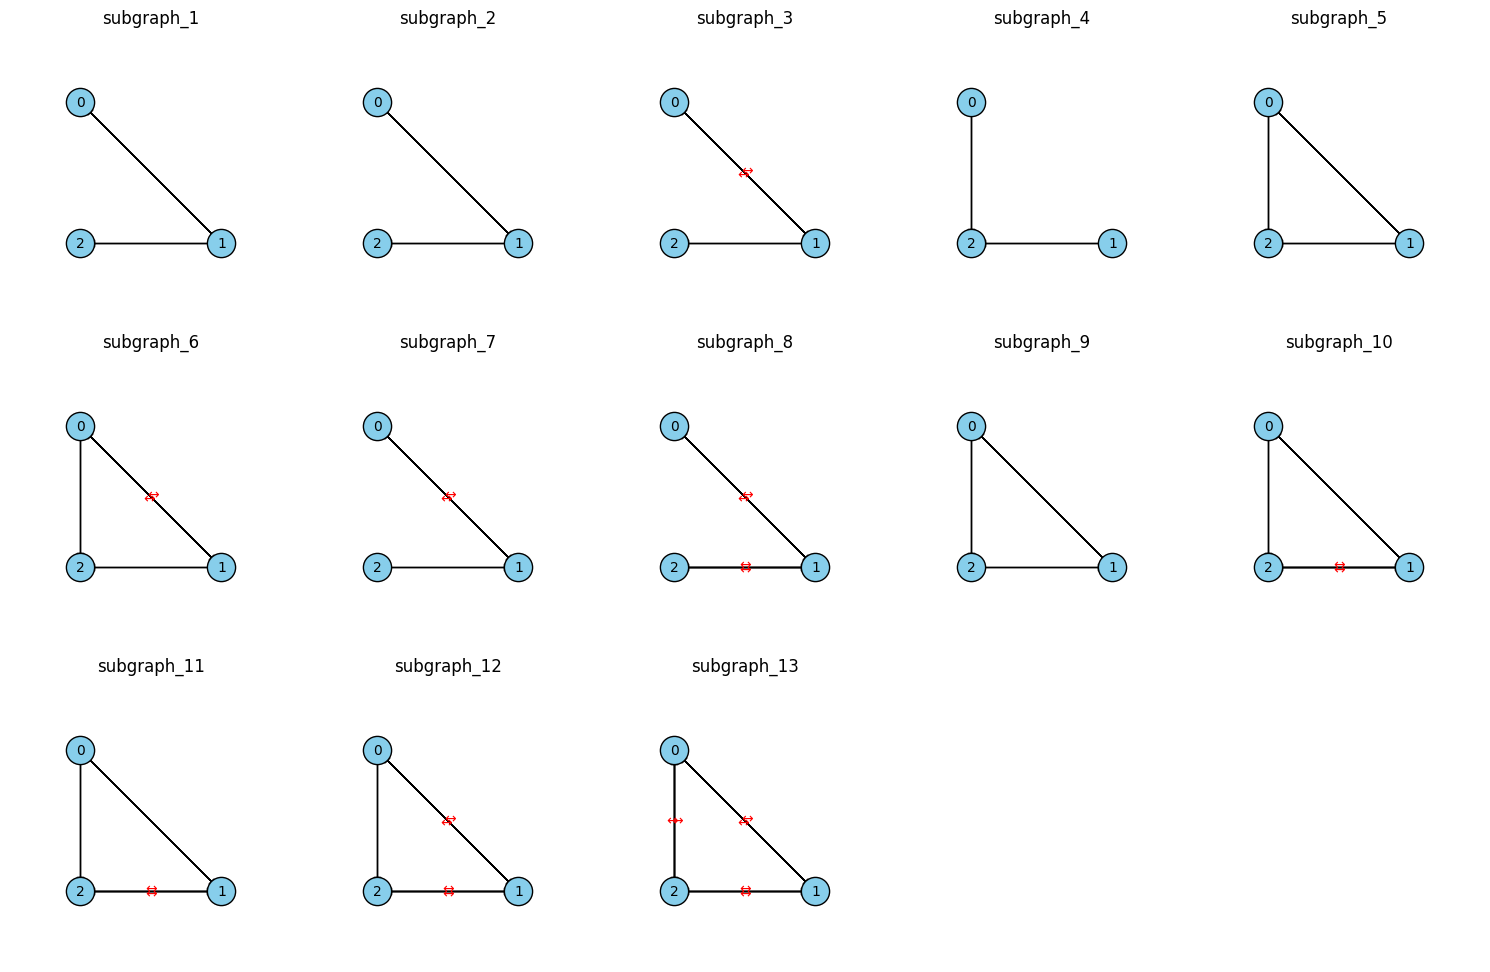

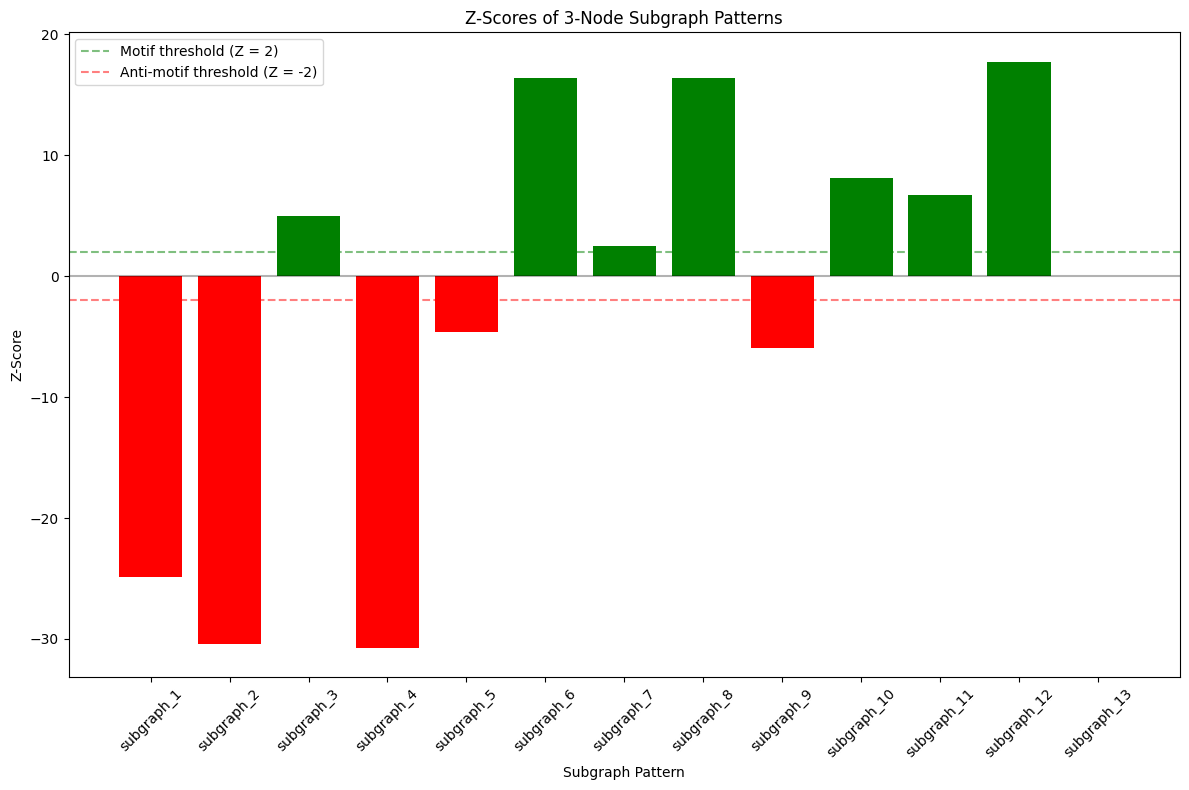

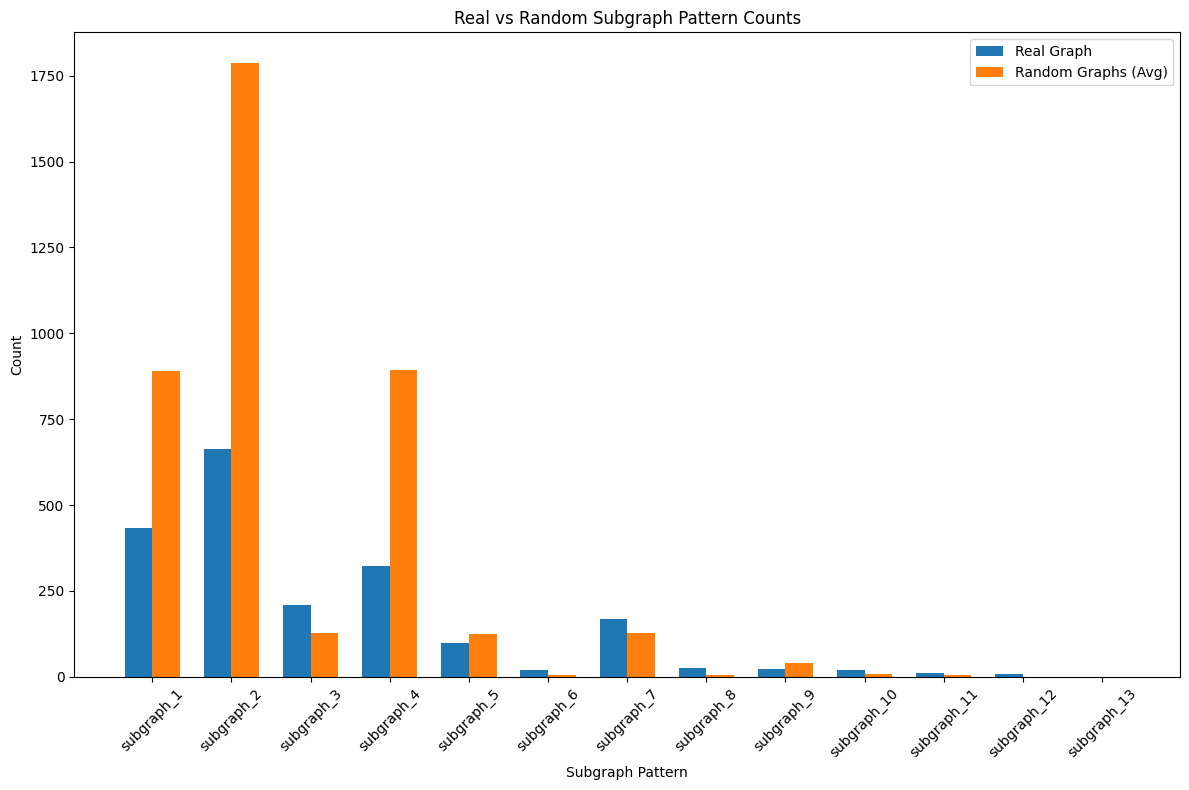

In [ ]:
import csv
import random
import math
import os
import matplotlib.pyplot as plt
import numpy as np

if not os.path.exists("result"):
    os.makedirs("result")

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}  # The dictionary will store edges as keys and their multiplicity as values 
        self.adjacency_list = {}
    
    def add_edge(self, u, v):
        self.nodes.add(u)
        self.nodes.add(v)
        
        # multiedges between u and v are stored as a tuple (u, v) in the edges dictionary
        edgeKey = (u, v)
        if edgeKey not in self.edges:
            self.edges[edgeKey] = 1
        else:
            self.edges[edgeKey] += 1
        if u not in self.adjacency_list:
            self.adjacency_list[u] = []
        self.adjacency_list[u].append(v)
        
        # Ensure all nodes appear in adjacency list even if they have no outgoing edges
        if v not in self.adjacency_list:
            self.adjacency_list[v] = []
    
    def getNodes(self):
        return list(self.nodes)
    
    def getEdges(self):
        return list(self.edges.keys())
    
    def edgeCount(self, with_multiplicity=True):
        if with_multiplicity:
            return sum(self.edges.values())
        else:
            return len(self.edges)
    
    def nodeCount(self):
        return len(self.nodes)
    
    def hasEdge(self, u, v):
        return (u, v) in self.edges
    
    def getEdgeM(self, u, v):
        return self.edges.get((u, v), 0)

def readFile(file_path):
    graph = Graph()    
    try:
        with open(file_path, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) == 2:
                    u, v = int(row[0]), int(row[1])
                    graph.add_edge(u, v)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        for i in range(10):
            for j in range(10):
                if i != j and random.random() < 0.3:
                    graph.add_edge(i, j)
    return graph

def randGraph(node_count, edge_count):
    graph = Graph()
    for i in range(node_count):
        if i not in graph.adjacency_list:
            graph.adjacency_list[i] = []
        graph.nodes.add(i)
    
    # Add random edges until we reach the desired count for generating a random graph
    allEdges = [(u, v) for u in range(node_count) for v in range(node_count) if u != v]
    random.shuffle(allEdges)
    edges_added = 0
    edge_index = 0
    
    while edges_added < edge_count and edge_index < len(allEdges):
        u, v = allEdges[edge_index]
        graph.add_edge(u, v)
        edges_added += 1
        edge_index += 1
        if edge_index >= len(allEdges):
            random.shuffle(allEdges)
            edge_index = 0
    
    return graph

# Define all 13 possible 3-node subgraph patterns and keep them in a dictionary and have a multiplicity of 1 for each edge
# The patterns are represented as adjacency matrices
def define_subgraph_patterns():
    patterns = {
        "subgraph_1": ((0, 0, 0), (1, 0, 1), (0, 0, 0)),
        "subgraph_2": ((0, 1, 0), (0, 0, 1), (0, 0, 0)),
        "subgraph_3": ((0, 1, 0), (1, 0, 1), (0, 0, 0)),
        "subgraph_4": ((0, 0, 1), (0, 0, 1), (0, 0, 0)),
        "subgraph_5": ((0, 0, 1), (1, 0, 1), (0, 0, 0)),
        "subgraph_6": ((0, 1, 1), (1, 0, 1), (0, 0, 0)),
        "subgraph_7": ((0, 1, 0), (1, 0, 0), (0, 1, 0)),
        "subgraph_8": ((0, 1, 0), (1, 0, 1), (0, 1, 0)),
        "subgraph_9": ((0, 0, 1), (1, 0, 0), (0, 1, 0)),
        "subgraph_10": ((0, 0, 1), (1, 0, 1), (0, 1, 0)),
        "subgraph_11": ((0, 1, 1), (0, 0, 1), (0, 1, 0)),
        "subgraph_12": ((0, 1, 1), (1, 0, 1), (0, 1, 0)),
        "subgraph_13": ((0, 1, 1), (1, 0, 1), (1, 1, 0))
    }
    
    return patterns

def creatAdjList(nodes, graph):
    n = len(nodes)
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i != j and graph.has_edge(nodes[i], nodes[j]):
                matrix[i][j] = 1
    
    return tuple(tuple(row) for row in matrix)

def patternMatch(subgraph_matrix, pattern_matrix):
    return subgraph_matrix == pattern_matrix

# The below function is automatically detecting the inwards an outgoing nodes for a particular nodes and then storing the results in a dictionary. 
def countSubgraph(graph, patterns):
    pattern_counts = {name: 0 for name in patterns}
    nodes_list = list(graph.nodes)

    for i in range(len(nodes_list)):
        for j in range(i + 1, len(nodes_list)):
            for k in range(j + 1, len(nodes_list)):
                triple = [nodes_list[i], nodes_list[j], nodes_list[k]]
                edges_in_triple = 0
                for u_idx, u in enumerate(triple):
                    for v_idx, v in enumerate(triple):
                        if u_idx != v_idx and graph.has_edge(u, v):
                            edges_in_triple += 1
                if edges_in_triple == 0:
                    continue
                subgraph_matrix = creatAdjList(triple, graph)
                matched = False
                for name, pattern in patterns.items():
                    permutations = [(0, 1, 2), (0, 2, 1), (1, 0, 2),(1, 2, 0), (2, 0, 1), (2, 1, 0)] 

                    for perm in permutations:
                        permNodes = [triple[perm[0]],triple[perm[1]], triple[perm[2]]]
                        permuted_matrix = creatAdjList(permNodes, graph)

                        if patternMatch(permuted_matrix, pattern):
                            pattern_counts[name] += 1
                            matched = True
                            break
                    if matched:
                        break
    for name in pattern_counts:
        pattern_counts[name] //= 6

    return pattern_counts

# Calculate the Z-score for each subgraph pattern and store in a dictionary
def ZScores(real_counts, random_avg_counts, randSTD):
    zScr = {}
    for pattern_name in real_counts:
        if randSTD[pattern_name] > 0:
            zScr[pattern_name] = (real_counts[pattern_name] - random_avg_counts[pattern_name]) / randSTD[pattern_name]
        else:
            zScr[pattern_name] = 0  # Avoid division by zero if std is zero
    # Normalize Z-scores to a range of -3 to 3
    return zScr

def motandAnti(z_scores, threshold=2.0):
    motifs = []
    anti_motifs = []
    normal = []
    
    for pattern_name, z_score in z_scores.items():
        if z_score > threshold:
            motifs.append((pattern_name, z_score))
        elif z_score < -threshold:
            anti_motifs.append((pattern_name, z_score))
        else:
            normal.append((pattern_name, z_score))
    
    return motifs, anti_motifs, normal

def plotSave(real_counts, random_avg_counts, random_std_counts, z_scores, motifs, anti_motifs, normal):
    with open("result/subgraph_counts.csv", "w") as f:
        f.write("Pattern,Real Count,Random Avg Count,Random Std Count,Z-Score,Type\n")
        for pattern_name in real_counts:
            pattern_type = "Motif" if (pattern_name, z_scores[pattern_name]) in motifs else "Anti-Motif" if (pattern_name, z_scores[pattern_name]) in anti_motifs else "Normal"
            f.write(f"{pattern_name},{real_counts[pattern_name]},{random_avg_counts[pattern_name]:.2f},{random_std_counts[pattern_name]:.2f},{z_scores[pattern_name]:.2f},{pattern_type}\n")

    plt.figure(figsize=(12, 8))
    
    x = list(range(len(z_scores)))
    pattern_names = list(z_scores.keys())
    z_values = [z_scores[name] for name in pattern_names]
    colors = ['green' if z > 2 else 'red' if z < -2 else 'blue' for z in z_values]
    
    plt.bar(x, z_values, color=colors)
    plt.axhline(y=2, color='green', linestyle='--', alpha=0.5, label='Motif threshold (Z = 2)')
    plt.axhline(y=-2, color='red', linestyle='--', alpha=0.5, label='Anti-motif threshold (Z = -2)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.xticks(x, pattern_names, rotation=45)
    plt.xlabel('Subgraph Pattern')
    plt.ylabel('Z-Score')
    plt.title('Z-Scores of 3-Node Subgraph Patterns')
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("result/z_scores.png")
    
    plt.figure(figsize=(12, 8))
    
    width = 0.35
    x = list(range(len(real_counts)))
    
    real_values = [real_counts[name] for name in pattern_names]
    random_values = [random_avg_counts[name] for name in pattern_names]
    
    plt.bar([i - width/2 for i in x], real_values, width, label='Real Graph')
    plt.bar([i + width/2 for i in x], random_values, width, label='Random Graphs (Avg)')
    
    plt.xticks(x, pattern_names, rotation=45)
    plt.xlabel('Subgraph Pattern')
    plt.ylabel('Count')
    plt.title('Real vs Random Subgraph Pattern Counts')
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("result/count_comparison.png")

# Main workflow
def main():
    print("Step 1: Loading real-world directed graph...")
    real_graph = readFile("directed_social_network.csv")
    print(f"Loaded graph with {real_graph.nodeCount()} nodes and {real_graph.edgeCount()} edges")
    print(f"Total edges with multiplicity: {real_graph.edgeCount(True)}")
    
    patterns = define_subgraph_patterns()
    
    # print("Visualizing the 13 subgraph patterns...")
    # visualize_subgraph_patterns(patterns)
    
    print("Step 2: Counting 3-node subgraph patterns in the real graph...")
    real_counts = countSubgraph(real_graph, patterns)
    print("Real graph subgraph counts:")
    for name, count in real_counts.items():
        print(f"  {name}: {count}")
    print("Step 3: Generating 100 random graphs using Erdős–Rényi model...")
    node_count = real_graph.nodeCount()
    edge_count = real_graph.edgeCount(True)
    random_counts = []
    for i in range(100):
        if i % 10 == 0:
            print(f"  Generating random graph {i+1}/100...")
        random_graph = randGraph(node_count, edge_count)
        random_count = countSubgraph(random_graph, patterns)
        random_counts.append(random_count)
    print("Step 4: Calculating average and standard deviation of random counts...")
    random_avg_counts = {name: 0 for name in patterns}
    random_std_counts = {name: 0 for name in patterns}
    for pattern_name in patterns:
        random_avg_counts[pattern_name] = sum(counts[pattern_name] for counts in random_counts) / len(random_counts)
    for pattern_name in patterns:
        variance = sum((counts[pattern_name] - random_avg_counts[pattern_name]) ** 2 for counts in random_counts) / len(random_counts)
        random_std_counts[pattern_name] = math.sqrt(variance)
    print("Random graph average subgraph counts:")
    for name, avg_count in random_avg_counts.items():
        print(f"  {name}: {avg_count:.2f} (std: {random_std_counts[name]:.2f})")
    print("Step 5: Calculating Z-scores...")
    z_scores = ZScores(real_counts, random_avg_counts, random_std_counts)
    print("Z-scores:")
    for name, z_score in z_scores.items():
        print(f"  {name}: {z_score:.2f}")
    print("Step 6: Identifying motifs and anti-motifs...")
    motifs, anti_motifs, normal = motandAnti(z_scores)
    print("Motifs (Z > 2):")
    for name, z_score in motifs:
        print(f"  {name}: {z_score:.2f}")    
    print("Anti-motifs (Z < -2):")
    for name, z_score in anti_motifs:
        print(f"  {name}: {z_score:.2f}")
    plotSave(real_counts, random_avg_counts, random_std_counts, z_scores, motifs, anti_motifs, normal) 
    print("Analysis complete. Results saved to 'result' folder.")

if __name__ == "__main__":
    main()
    